

## Bitcoin Price Prediction
> Predicting the daily price of Bitcoin

> The data contains 5 features containing information about the date, open, close, high and low prices of bitcoin on a daily basis.

source:https://finance.yahoo.com/quote/BTC-USD/history/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the dataset
data = pd.read_csv('/content/drive/MyDrive/Bitcoin Predictor/BTC-USD - BTC-USD (2).csv')
data.head()

,Date,Open,High,Low,Close
0,2018-12-16,3236.274658,3305.753174,3233.819824,3252.839111
1,2018-12-17,3253.123047,3597.917969,3253.123047,3545.864746
2,2018-12-18,3544.761475,3701.349365,3487.169189,3696.059082
3,2018-12-19,3706.824951,3949.322998,3687.229980,3745.950684
4,2018-12-20,3742.195068,4191.228516,3728.974609,4134.441406


In [4]:
# Looking into the number of rows and columns present in the dataset
data.shape

(1811, 5)

In [5]:
# getting the statistical summary of the numerical features
data.describe()

,Open,High,Low,Close
count,1811.000000,1811.000000,1811.000000,1811.000000
mean,24086.093370,24636.692297,23495.476836,24102.876137
std,16078.366810,16489.051712,15600.038799,16069.775409
min,3236.274658,3305.753174,3233.819824,3252.839111
25%,9531.058106,9699.287597,9371.764160,9533.348144
50%,21195.041020,21620.628910,20777.511720,21231.656250
75%,35543.361330,36596.443360,34206.318360,35552.236330
max,67549.734380,68789.625000,66382.062500,67566.828130


In [6]:
# Assessing the datatypes present within the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1811 non-null   object 
 1   Open    1811 non-null   float64
 2   High    1811 non-null   float64
 3   Low     1811 non-null   float64
 4   Close   1811 non-null   float64
dtypes: float64(4), object(1)
memory usage: 70.9+ KB


In [7]:
# checking for null values
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

## Feature Engineering
### Interaction Features

*   High-low range
*   Rate of Daily Price Change
*   Close to open ratio
*   Product of high and low
*   Product of open and close





In [8]:
# High-low range
data['High_Low_Range'] = data['High'] - data['Low']

In [9]:
# Rate of Daily Price Change
data['Rate_of_Daily_Price_Change'] = (data['Close'] - data['Open']) / data['Open']


In [10]:
# Close to open ratio
data['Close_to_Open_Ratio'] = data['Close'] / data['Open']

In [11]:
# Product of high and low
data['Product_of_High_and_Low'] = data['High'] * data['Low']

In [12]:
# Product of open and close
data['Product_of_Open_and_Close'] = data['Open'] * data['Close']

In [13]:
data.head()

,Date,Open,High,Low,Close,High_Low_Range,Rate_of_Daily_Price_Change,Close_to_Open_Ratio,Product_of_High_and_Low,Product_of_Open_and_Close
0,2018-12-16,3236.274658,3305.753174,3233.819824,3252.839111,71.933350,0.005118,1.005118,1.069021e+07,1.052708e+07
1,2018-12-17,3253.123047,3597.917969,3253.123047,3545.864746,344.794922,0.089988,1.089988,1.170447e+07,1.153513e+07
2,2018-12-18,3544.761475,3701.349365,3487.169189,3696.059082,214.180176,0.042682,1.042682,1.290723e+07,1.310165e+07
3,2018-12-19,3706.824951,3949.322998,3687.229980,3745.950684,262.093018,0.010555,1.010555,1.456206e+07,1.388558e+07
4,2018-12-20,3742.195068,4191.228516,3728.974609,4134.441406,462.253907,0.104817,1.104817,1.562898e+07,1.547189e+07


In [14]:
data.isnull().sum()

Date                          0
Open                          0
High                          0
Low                           0
Close                         0
High_Low_Range                0
Rate_of_Daily_Price_Change    0
Close_to_Open_Ratio           0
Product_of_High_and_Low       0
Product_of_Open_and_Close     0
dtype: int64

In [15]:
# Convert date to datetime object
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1811 non-null   object 
 1   Open                        1811 non-null   float64
 2   High                        1811 non-null   float64
 3   Low                         1811 non-null   float64
 4   Close                       1811 non-null   float64
 5   High_Low_Range              1811 non-null   float64
 6   Rate_of_Daily_Price_Change  1811 non-null   float64
 7   Close_to_Open_Ratio         1811 non-null   float64
 8   Product_of_High_and_Low     1811 non-null   float64
 9   Product_of_Open_and_Close   1811 non-null   float64
dtypes: float64(9), object(1)
memory usage: 141.6+ KB


<ipython-input-17-c8671a31ccd0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


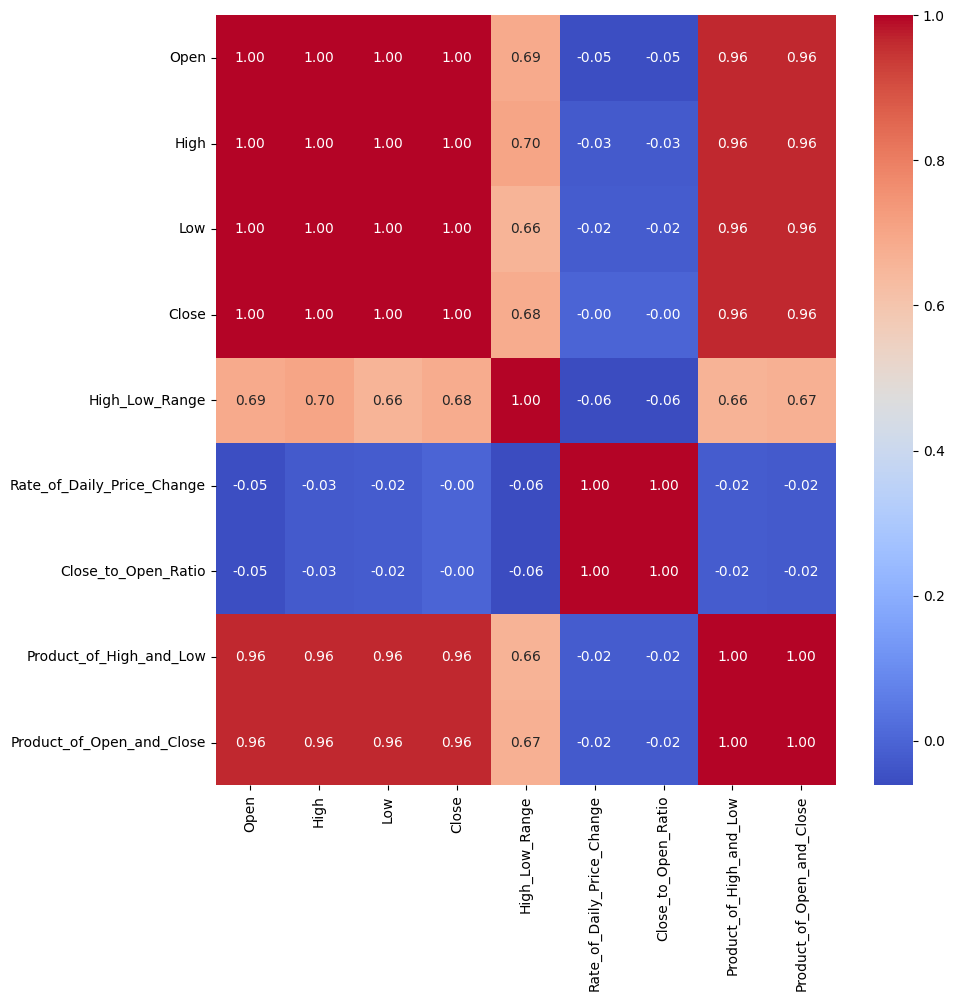

In [17]:
# creating a correlation heatmap
import seaborn as sns
corr_matrix = data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show;

>> From the heatmap above we have strong correlation between the features indicating strong linear realationships. Therefore, we need to create new features to help capture the non-linear relationships.

## Standardization of the Data

Since the different features have different magnitudes which could impact the performance of the model when creating polynomial features, scaling will help standardize them to improve performance of models sensitive to differences in scale.



In [18]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['Open', 'High', 'Low']
data[columns] = scaler.fit_transform(data[columns])


In [19]:
scaler2=StandardScaler()
column = ['Close']
data[column] = scaler2.fit_transform(data[column])



In [20]:
data.describe()

,Open,High,Low,Close,High_Low_Range,Rate_of_Daily_Price_Change,Close_to_Open_Ratio,Product_of_High_and_Low,Product_of_Open_and_Close
count,1.811000e+03,1.811000e+03,1.811000e+03,1.811000e+03,1811.000000,1811.000000,1811.000000,1.811000e+03,1.811000e+03
mean,1.569393e-16,-3.452665e-16,-3.138786e-17,2.197150e-16,1141.215461,0.001949,1.001949,8.354819e+08,8.382424e+08
std,1.000276e+00,1.000276e+00,1.000276e+00,1.000276e+00,1305.487555,0.035251,0.035251,9.708743e+08,9.744899e+08
min,-1.297120e+00,-1.294000e+00,-1.299180e+00,-1.297827e+00,18.922608,-0.371869,0.628131,1.069021e+07,1.052708e+07
25%,-9.055059e-01,-9.061486e-01,-9.056140e-01,-9.068921e-01,284.166504,-0.013142,0.986858,9.108744e+07,9.108537e+07
50%,-1.798597e-01,-1.829636e-01,-1.742762e-01,-1.787214e-01,647.986330,0.000609,1.000609,4.497516e+08,4.503996e+08
75%,7.127859e-01,7.255150e-01,6.867803e-01,7.126747e-01,1555.968750,0.016595,1.016595,1.236075e+09,1.267566e+09
max,2.703984e+00,2.678452e+00,2.749893e+00,2.705449e+00,12864.621100,0.187972,1.187972,4.549185e+09,4.523929e+09


In [21]:
data.describe()


,Open,High,Low,Close,High_Low_Range,Rate_of_Daily_Price_Change,Close_to_Open_Ratio,Product_of_High_and_Low,Product_of_Open_and_Close
count,1.811000e+03,1.811000e+03,1.811000e+03,1.811000e+03,1811.000000,1811.000000,1811.000000,1.811000e+03,1.811000e+03
mean,1.569393e-16,-3.452665e-16,-3.138786e-17,2.197150e-16,1141.215461,0.001949,1.001949,8.354819e+08,8.382424e+08
std,1.000276e+00,1.000276e+00,1.000276e+00,1.000276e+00,1305.487555,0.035251,0.035251,9.708743e+08,9.744899e+08
min,-1.297120e+00,-1.294000e+00,-1.299180e+00,-1.297827e+00,18.922608,-0.371869,0.628131,1.069021e+07,1.052708e+07
25%,-9.055059e-01,-9.061486e-01,-9.056140e-01,-9.068921e-01,284.166504,-0.013142,0.986858,9.108744e+07,9.108537e+07
50%,-1.798597e-01,-1.829636e-01,-1.742762e-01,-1.787214e-01,647.986330,0.000609,1.000609,4.497516e+08,4.503996e+08
75%,7.127859e-01,7.255150e-01,6.867803e-01,7.126747e-01,1555.968750,0.016595,1.016595,1.236075e+09,1.267566e+09
max,2.703984e+00,2.678452e+00,2.749893e+00,2.705449e+00,12864.621100,0.187972,1.187972,4.549185e+09,4.523929e+09






###  Polynomial Features

*   Quadratic and Cubic of the features

### Logarithmic Features

*   Logarithm of the high-low range





In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Quadratic and Cubic features
columns = ['Open', 'High', 'Low', 'Close']
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(data[columns])

# Create a DataFrame with the polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(columns))
df = poly_df.drop(['Open', 'High', 'Low', 'Close'], axis=1)

print(df.columns)




Index(['Open^2', 'Open High', 'Open Low', 'Open Close', 'High^2', 'High Low',
       'High Close', 'Low^2', 'Low Close', 'Close^2', 'Open^3', 'Open^2 High',
       'Open^2 Low', 'Open^2 Close', 'Open High^2', 'Open High Low',
       'Open High Close', 'Open Low^2', 'Open Low Close', 'Open Close^2',
       'High^3', 'High^2 Low', 'High^2 Close', 'High Low^2', 'High Low Close',
       'High Close^2', 'Low^3', 'Low^2 Close', 'Low Close^2', 'Close^3'],
      dtype='object')


In [23]:
# Concatenate the original DataFrame with the polynomial features DataFrame
data = pd.concat([data, df], axis=1)

In [24]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'High_Low_Range',
       'Rate_of_Daily_Price_Change', 'Close_to_Open_Ratio',
       'Product_of_High_and_Low', 'Product_of_Open_and_Close', 'Open^2',
       'Open High', 'Open Low', 'Open Close', 'High^2', 'High Low',
       'High Close', 'Low^2', 'Low Close', 'Close^2', 'Open^3', 'Open^2 High',
       'Open^2 Low', 'Open^2 Close', 'Open High^2', 'Open High Low',
       'Open High Close', 'Open Low^2', 'Open Low Close', 'Open Close^2',
       'High^3', 'High^2 Low', 'High^2 Close', 'High Low^2', 'High Low Close',
       'High Close^2', 'Low^3', 'Low^2 Close', 'Low Close^2', 'Close^3'],
      dtype='object')

In [25]:
# Logarithm of high-low range
data['Log_High_Low'] = np.log(data['High_Low_Range'])


In [26]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'High_Low_Range',
       'Rate_of_Daily_Price_Change', 'Close_to_Open_Ratio',
       'Product_of_High_and_Low', 'Product_of_Open_and_Close', 'Open^2',
       'Open High', 'Open Low', 'Open Close', 'High^2', 'High Low',
       'High Close', 'Low^2', 'Low Close', 'Close^2', 'Open^3', 'Open^2 High',
       'Open^2 Low', 'Open^2 Close', 'Open High^2', 'Open High Low',
       'Open High Close', 'Open Low^2', 'Open Low Close', 'Open Close^2',
       'High^3', 'High^2 Low', 'High^2 Close', 'High Low^2', 'High Low Close',
       'High Close^2', 'Low^3', 'Low^2 Close', 'Low Close^2', 'Close^3',
       'Log_High_Low'],
      dtype='object')

In [27]:
data.isnull().sum()

Date                          0
Open                          0
High                          0
Low                           0
Close                         0
High_Low_Range                0
Rate_of_Daily_Price_Change    0
Close_to_Open_Ratio           0
Product_of_High_and_Low       0
Product_of_Open_and_Close     0
Open^2                        0
Open High                     0
Open Low                      0
Open Close                    0
High^2                        0
High Low                      0
High Close                    0
Low^2                         0
Low Close                     0
Close^2                       0
Open^3                        0
Open^2 High                   0
Open^2 Low                    0
Open^2 Close                  0
Open High^2                   0
Open High Low                 0
Open High Close               0
Open Low^2                    0
Open Low Close                0
Open Close^2                  0
High^3                        0
High^2 L




### Handling missing values

In [28]:
data.shape

(1811, 41)

In [29]:
data.shape

(1811, 41)

In [30]:
data['Date'].tail()

1806    2023-11-26
1807    2023-11-27
1808    2023-11-28
1809    2023-11-29
1810    2023-11-30
Name: Date, dtype: object

### Checking for Stationarity of the data

In [31]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'], autolag='AIC')

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.6059331151590532
p-value: 0.4806124536460541


<Axes: >

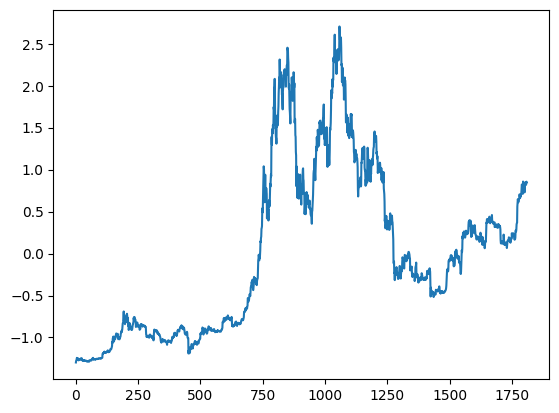

In [32]:
temp = data['Close']
temp.plot()

## Training the Model to  predict the close price



### Splitting data to x and y using the sliding window *method*

In [33]:
def data_to_X_y(data, window_size=20):
  data_np = data.to_numpy()
  X = []
  y = []
  for i in range(len(data_np)-window_size):
    row = [[a] for a in data_np[i:i+window_size]]
    X.append(row)
    label = data_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [34]:
WINDOW_SIZE = 5
data_to_pred = data['Close']
X, y =  data_to_X_y(data_to_pred , WINDOW_SIZE)
X.shape, y.shape

((1806, 5, 1), (1806,))

In [35]:
# Splitting data into training, validation and testing sets in the 80:10:10 ratio
X_train, y_train = X[:1409], y[:1409]
X_val, y_val = X[1409:1585], y[1409:1585]
X_test, y_test = X[1585:], y[1585:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1409, 5, 1), (1409,), (176, 5, 1), (176,), (221, 5, 1), (221,))

## Prediction using Different Time Series Models

### Model 1: Long Short-Term Memory(LSTM)

#### Training and Testing the Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model



In [37]:
model_one = Sequential()
model_one.add(InputLayer((5, 1)))
model_one.add(LSTM(64))
model_one.add(Dense(8, 'relu'))
model_one.add(Dense(1, 'linear'))



In [38]:
model_one.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
cp_one= ModelCheckpoint('model_one/', save_best_only=True)
model_one.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [40]:
model_one.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp_one])

Epoch 1/10
45/45 [==============================] - 8s 136ms/step - loss: 0.1138 - root_mean_squared_error: 0.3373 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0852
Epoch 2/10
45/45 [==============================] - 4s 94ms/step - loss: 0.0201 - root_mean_squared_error: 0.1419 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664
Epoch 3/10
45/45 [==============================] - 0s 5ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 4/10
45/45 [==============================] - 4s 81ms/step - loss: 0.0101 - root_mean_squared_error: 0.1005 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0652
Epoch 5/10
45/45 [==============================] - 4s 101ms/step - loss: 0.0101 - root_mean_squared_error: 0.1006 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 6/10
45/45 [==============================] - 5s 113ms/step - loss: 0.0088 - root_mean_squared_error: 0.0939 - val_loss: 0.0031 - val_root

In [41]:
model_one = load_model('model_one/')

In [42]:
train_predictions = model_one.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

45/45 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,-1.165161,-1.257760
1,-1.162304,-1.250437
2,-1.159392,-1.251383
3,-1.157982,-1.246427
4,-1.155546,-1.262805
...,...,...
1404,-0.275656,-0.249420
1405,-0.256767,-0.207430
1406,-0.231774,-0.237595
1407,-0.231521,-0.218329


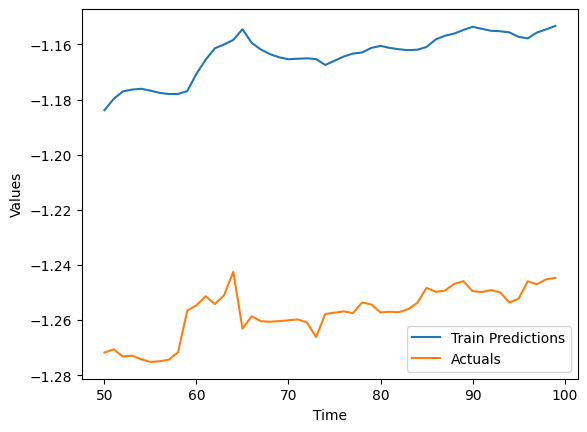

In [43]:
import matplotlib.pyplot as plt

plt.plot(train_results['Train Predictions'][50:100], label='Train Predictions')
plt.plot(train_results['Actuals'][50:100], label='Actuals')

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.show()

In [44]:
val_predictions = model_one.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

6/6 [==============================] - 0s 5ms/step


,Val Predictions,Actuals
0,-0.218091,-0.215823
1,-0.218757,-0.224527
2,-0.223075,-0.225181
3,-0.225605,-0.245458
4,-0.234388,-0.242316
...,...,...
171,0.395096,0.293788
172,0.345827,0.257891
173,0.301108,0.197570
174,0.247114,0.231220


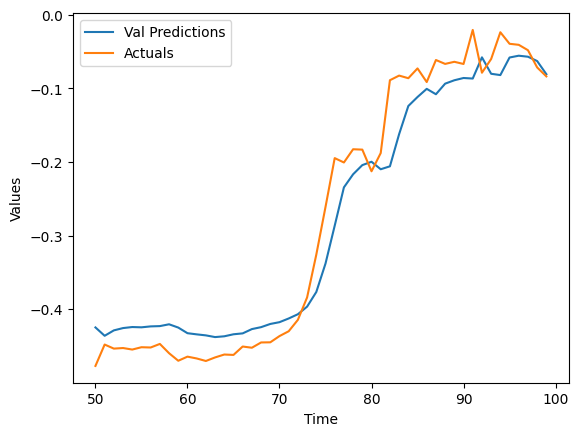

In [45]:
import matplotlib.pyplot as plt

plt.plot(val_results['Val Predictions'][50:100], label='Val Predictions')
plt.plot(val_results['Actuals'][50:100], label='Actuals')

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.show()

In [46]:
test_predictions = model_one.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

7/7 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
0,0.239714,0.213034
1,0.235188,0.261726
2,0.262103,0.268891
3,0.279231,0.334317
4,0.325003,0.326005
...,...,...
216,0.803103,0.832615
217,0.797622,0.818613
218,0.786979,0.854524
219,0.801715,0.856229


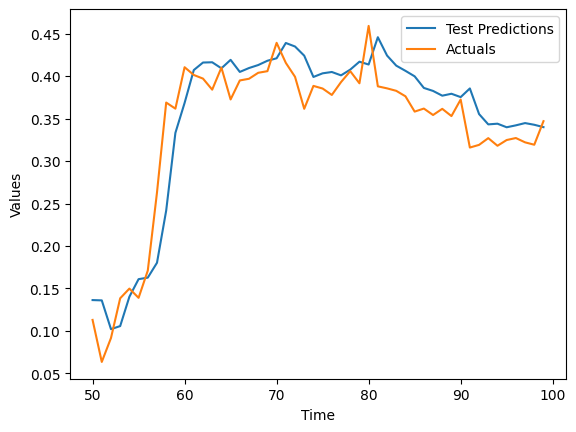

In [47]:
import matplotlib.pyplot as plt

plt.plot(test_results['Test Predictions'][50:100], label='Test Predictions')
plt.plot(test_results['Actuals'][50:100], label='Actuals')

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.show()

#### Model Evaluation

In [48]:
### Caluclating mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, test_predictions)
mae

0.03398436932212258

In [49]:
### Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, test_predictions)
mse

0.001980167599010747

In [50]:
rmse = math.sqrt(mse)
rmse

0.044499074136556446

### Model 2:ARIMA

#### Training and Testing the Model

Using pmdarima to leverage its automatic order selection and seasonal decomposition functionalities.

In [51]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


In [52]:
#finding the optimal order(p, d and q) values for the arima model using auto_arima
import pmdarima as pm
target = data['Close']
model_two = pm.auto_arima(target, trace= True, d=1, seasonal=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4795.113, Time=6.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4797.746, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4797.743, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4797.694, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4799.130, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4795.823, Time=1.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 9.526 seconds


In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
from pmdarima.model_selection import train_test_split
train_arima, test_arima = train_test_split(target, train_size=0.8)


In [55]:
model_two = ARIMA(target, order=(0,1,0))
results = model_two.fit()


In [56]:
start = len(train_arima)
end = len(train_arima) + len(test_arima) - 1
pred_arima = results.get_prediction(start=start, end=end, dynamic=False)


In [57]:
pred_values = pred_arima.predicted_mean
pred_values

1448   -0.436606
1449   -0.447836
1450   -0.434002
1451   -0.443691
1452   -0.436553
          ...   
1806    0.852389
1807    0.832615
1808    0.818613
1809    0.854524
1810    0.856229
Name: predicted_mean, Length: 363, dtype: float64

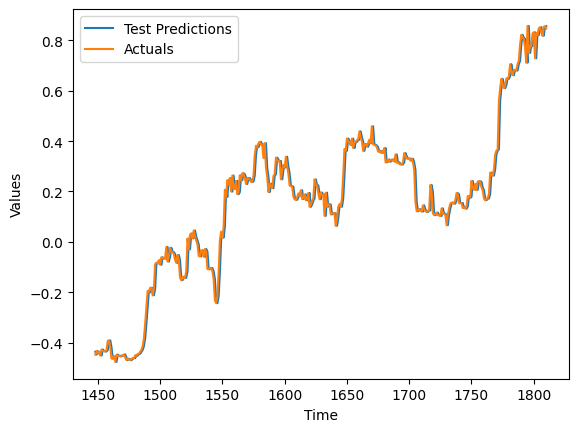

In [58]:
import matplotlib.pyplot as plt

plt.plot(pred_values, label='Test Predictions')
plt.plot(test_arima, label='Actuals')

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.show()

#### Model Evaluation





In [59]:
### Caluclating mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_arima, pred_values)
mae

0.024240945515498526

In [60]:
### Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_arima, pred_values)
mse

0.0013774923528399757

In [61]:
rmse = math.sqrt(mse)
rmse

0.03711458409897618

### Model 3:  Gated Recurrent Unit (GRU)




#### Training and Testing the Model

In [62]:
model_three = Sequential()
model_three.add(InputLayer((5, 1)))
model_three.add(GRU(64))
model_three.add(Dense(8, 'relu'))
model_three.add(Dense(1, 'linear'))
model_three.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model_three.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
cp_three= ModelCheckpoint('model_three/', save_best_only=True)
model_three.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.015), metrics=[RootMeanSquaredError()])

In [65]:
model_three.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp_three])

Epoch 1/10
45/45 [==============================] - 9s 157ms/step - loss: 0.0826 - root_mean_squared_error: 0.2874 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1102
Epoch 2/10
45/45 [==============================] - 8s 181ms/step - loss: 0.0079 - root_mean_squared_error: 0.0888 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 3/10
45/45 [==============================] - 0s 9ms/step - loss: 0.0066 - root_mean_squared_error: 0.0810 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0515
Epoch 4/10
45/45 [==============================] - 11s 242ms/step - loss: 0.0072 - root_mean_squared_error: 0.0851 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0438
Epoch 5/10
45/45 [==============================] - 8s 177ms/step - loss: 0.0059 - root_mean_squared_error: 0.0767 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0432
Epoch 6/10
45/45 [==============================] - 0s 10ms/step - loss: 0.0067 - root_mean_squared_error: 0.0816 - val_loss: 0.0020 - val_ro

In [66]:
model_three = load_model('model_three/')

In [67]:
train_predictions = model_three.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

45/45 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,-1.249130,-1.257760
1,-1.248118,-1.250437
2,-1.245183,-1.251383
3,-1.244072,-1.246427
4,-1.241207,-1.262805
...,...,...
1404,-0.289797,-0.249420
1405,-0.264112,-0.207430
1406,-0.226008,-0.237595
1407,-0.229574,-0.218329


In [68]:
test_predictions = model_three.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

7/7 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
0,0.208091,0.213034
1,0.204133,0.261726
2,0.240085,0.268891
3,0.261094,0.334317
4,0.314506,0.326005
...,...,...
216,0.838803,0.832615
217,0.822358,0.818613
218,0.803944,0.854524
219,0.831989,0.856229


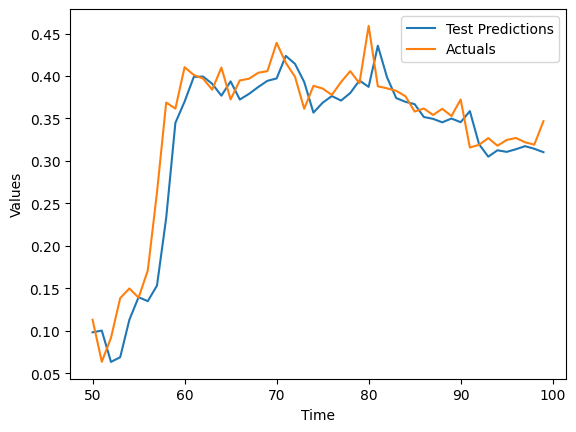

In [69]:
import matplotlib.pyplot as plt

plt.plot(test_results['Test Predictions'][50:100], label='Test Predictions')
plt.plot(test_results['Actuals'][50:100], label='Actuals')

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.show()

#### Model Evaluation

In [70]:
### Caluclating mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, test_predictions)
mae

0.026811052504295187

In [71]:
### Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, test_predictions)
mse

0.001545299099858881

In [72]:
rmse = math.sqrt(mse)
rmse

0.03931029254354235

In [73]:
import joblib
joblib.dump(model_three, 'gru.sav')

['gru.sav']

In [74]:
joblib.dump(scaler2, 'scaler.sav')

['scaler.sav']